In [12]:
import pandas as pd
import os

In [50]:
df.head()
files= [file for file in os.listdir("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data"+file)
    all_months_data=pd.concat([all_months_data,df])





FileNotFoundError: [Errno 2] No such file or directory: 'Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_DataSales_December_2019.csv'

In [60]:
#combining the data into one data frame for the analysis
df.head()


jan= pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_2019.csv")
jan.head()
feb=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv")
march=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv")
apr=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
may=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv")
jun=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_June_2019.csv")
july=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_July_2019.csv")
aug=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv")
sep=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_September_2019.csv")
oct=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_October_2019.csv")
nov=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv")
dec=pd.read_csv("/Users/utkarshmishra/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv")
dec.head()
all_months_data=pd.DataFrame()
all_months_data=pd.concat([all_months_data,jan,feb,march,apr,may,jun,july,aug,sep,oct,nov,dec])
all_months_data.head()
all_months_data.to_csv("all_data_1.csv",index= False)
all_data_1=pd.read_csv("all_data_1.csv")
all_data_1.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [89]:
#Cleaning the data

#Drop rows of NAN
all_data_1.head()
nan_df= all_data_1[all_data_1.isna().any(axis=1)]
nan_df.head()
all_data_1=all_data_1.dropna(how="all")
all_data_1.head()
#Find "OR" and Deleting it
all_data_1=all_data_1[all_data_1['Order Date'].str[0:2]!='Or']
#Converting columns to the correct data type
all_data_1['Quantity Ordered']=pd.to_numeric(all_data_1['Quantity Ordered'])
all_data_1['Price Each']=pd.to_numeric(all_data_1['Price Each'])
all_data_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [86]:
# Data with an additional column
#Adding the month column
all_data_1['Month']=all_data_1['Order Date'].str[0:2]
all_data_1.head()
all_data_1['Month']=all_data_1['Month'].astype('int32')
all_data_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [91]:
#Adding Total Sales column
all_data_1["Total_sales"]=all_data_1["Quantity Ordered"]*all_data_1["Price Each"]
all_data_1.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [202]:
#Q1.) What was the Best Month of the sales?How much is the amount earned ?
absolute_sales=all_data_1.groupby('Month').sum()["Total_sales"]
absolute_sales
# December was the best month for the sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total_sales, dtype: float64

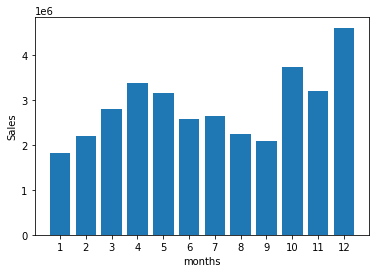

In [134]:
#Plotting the Total_sales
import matplotlib.pyplot as plt
months= range(1,13)
plt.bar(months, absolute_sales)
plt.xticks(months)
plt.ylabel("Sales")
plt.xlabel("months")
plt.show()
# Maximum sales was done in the 12th month

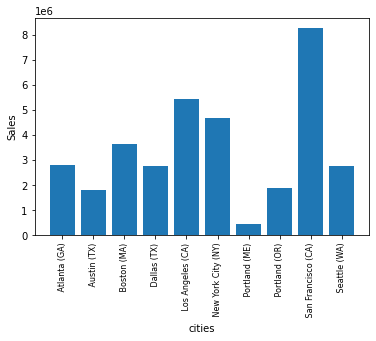

In [187]:
#Q2.)City With the Highest Sales ?
#Adding a City Column
all_data_1['City']=all_data_1['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data_1.head()
all_data_1.drop(columns="Column")
#Cleaning Data on the basis of City and the State for understanding
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data_1['City']=all_data_1['Purchase Address'].apply(lambda x: get_city(x)+ ' (' +get_state(x)+')')

all_data_1.head()
#City with the Highest sales
absolute_sales=all_data_1.groupby('City').sum()
absolute_sales
#Plotting the Sales 
import matplotlib.pyplot as plt
Cities= [city for city, df in all_data_1.groupby('City')]
plt.bar(Cities, absolute_sales["Total_sales"])
plt.xticks(Cities,rotation = "vertical", size = 8)
plt.ylabel("Sales")
plt.xlabel("cities")
plt.show()
# San Francisco is the best city in terms of sales


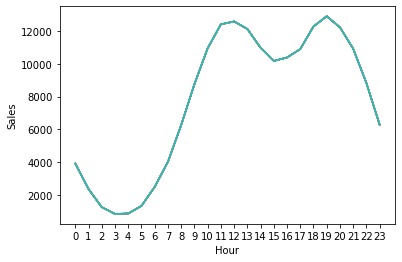

In [198]:
# What time should we display our advertsing for the best sales?
all_data_1['Order Date']= pd.to_datetime(all_data_1['Order Date'])
all_data_1.head()
all_data_1['Hour']= all_data_1['Order Date'].dt.hour
all_data_1.head()
hours= [hour for hour, df in all_data_1.groupby('Hour')]
plt.plot(hours, all_data_1.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.show()

# the best time to order is between 11 pm as per the line chart.


In [ ]:
#Q3.) Highest sold Product ?
all_data_1.head()
Diff_product= all_data_1.groupby('Product')
Most_sales=all_data_1.groupby('Product').sum()['Quantity Ordered']
Most_sales.head()
products= [product for product, df in Diff_product]
plt.bar(products, Most_sales)
plt.ylabel('Quantity')
plt.xlabel("product")
plt.xticks(products, rotation = "vertical", size= 8)
plt.show()

In [226]:
#Q4.) What products are sole together ?
df= all_data_1[all_data_1['Order ID'].duplicated(keep= False)]
df["Group"]= df.groupby('Order ID')["Product"].transform(lambda x: ",".join(x))
df= df[['Order ID','Group']].drop_duplicates()
df.head()


/var/folders/1b/0_g1qmvx3dv_r4mlgcss3_dr0000gn/T/ipykernel_13438/297029577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Group"]= df.groupby('Order ID')["Product"].transform(lambda x: ",".join(x))


,Order ID,Group
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [234]:
from itertools import combinations
from collections import Counter 
count= Counter()
for row in df["Group"]:
    row_list= row.split(',')
    count.update((Counter(combinations(row_list,2))))
for key, value in count.most_common(10):
    print(key,value)
# So the Iphone along with Lightning charging cable is ordered together the most

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
prices = all_data_1.groupby('Product').mean("Price Each")
prices.head()